In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv("gas_turbines.csv")

In [6]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [7]:
data.shape

(15039, 11)

In [8]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [9]:
data=data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX','TEY']]
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [10]:
x=data.iloc[:,0:-1]
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [11]:
y=data.iloc[:,-1]
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [12]:
data.shape

(15039, 11)

In [13]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [15]:
# CREATING MODEL 

model=tf.keras.models.Sequential()
model.adata(tf.keras.layers.Dense(15,input_dim=10,activation ='ReLU'))
model.adata(tf.keras.layers.Dense(10,activation='ReLU'))
model.adata(tf.keras.layers.Dense(1,activation='ReLU'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [35]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=1000)

Epoch 1/50
13/13 [==============================] - 0s 3ms/step - loss: 18278.8848 - mse: 18278.8848 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 18278.8848 - mse: 18278.8848 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 18278.8848 - mse: 18278.8848 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 18278.8848 - mse: 

Epoch 46/50
13/13 [==============================] - 0s 2ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 47/50
13/13 [==============================] - 0s 2ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 48/50
13/13 [==============================] - 0s 1ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 49/50
13/13 [==============================] - 0s 1ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 50/50
13/13 [==============================] - 0s 2ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587


In [36]:
model.save_weights("mywt.kmw")

In [37]:
scores=model.evaluate(x_train,y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

376/376 [==============================] - 0s 310us/step - loss: 18278.8887 - mse: 18278.8887 - mae: 134.2709
mse: 1827888.87%


In [21]:
model.history.history.keys()


dict_keys([])

In [22]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

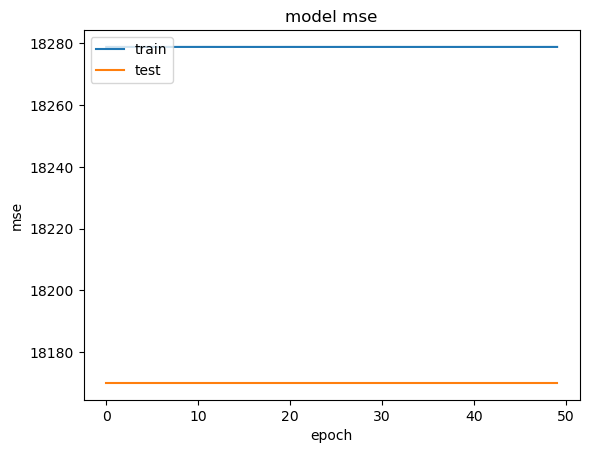

In [23]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

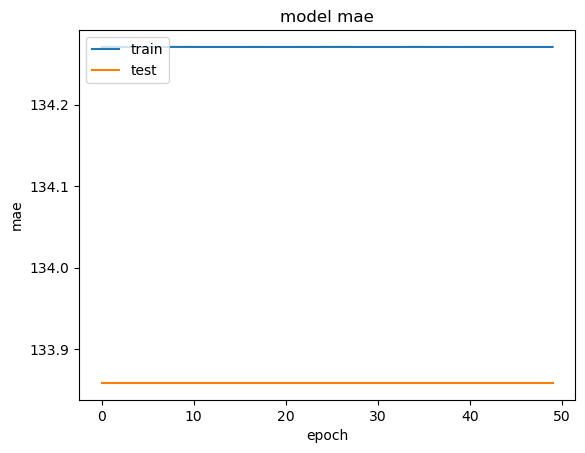

In [24]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

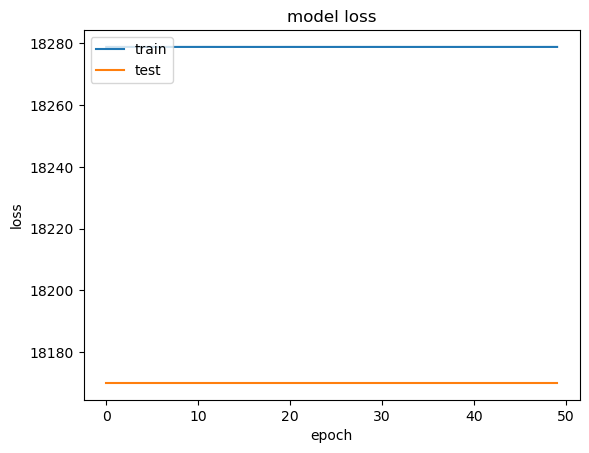

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse=mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse=mean_squared_error(y_test,y_test_pred,squared=False)

print('Training set rmse: %.3f, Testing set rmse: %.3f' % (train_rmse,test_rmse))

94/94 [==============================] - 0s 271us/step
Training set rmse: 135.199, Testing set rmse: 134.796


In [27]:
# randomzied search  cv
from sklearn.model_selection import RandomizedSearchCV, KFold
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor

In [28]:
def keras_reg_model(learning_rate,activation_function,init,neuron1,neuron2):
    model = tf.keras.models.Sequential()
    model.adata(tf.keras.layers.Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.adata(tf.keras.layers.Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.adata(tf.keras.layers.Dense(1,activation = 'linear'))
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse','mae'])
    return model

In [29]:
keras_reg = KerasRegressor(build_fn = keras_reg_model,verbose = 0)

In [30]:
batch_size = [10,50,100,500,1000,2000]
epochs = [25,50,80,100,150]
learning_rate = [0.001,0.01,0.1]

activation_function = ['elu','relu','linear']
init = ['uniform','normal','zero']
neuron1 = [5,10,20,30]
neuron2 = [5,10,20,30]


param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)


random_search = RandomizedSearchCV(estimator = keras_reg,param_distributions = param_grids,cv = 5,n_jobs=-1,verbose = 10,
                                   random_state=40)
random_result = random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-06-05 22:11:27.815046: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Users/kish

/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/kishoresuddapalli/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` arg

In [31]:
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)

Best score: -2.920744204521179
Best parameters: {'neuron2': 5, 'neuron1': 20, 'learning_rate': 0.01, 'init': 'uniform', 'epochs': 100, 'batch_size': 500, 'activation_function': 'linear'}


In [32]:
d1= random_result.best_params_

keras_tuned=keras_reg_model(learning_rate=d1['learning_rate'],activation_function=d1['activation_function'],init=d1['init'],
                                                                                       neuron1=d1['neuron1'],neuron2=d1['neuron2'])
history2=keras_tuned.fit(x_train, y_train, validation_data=(x_test,y_test),
                         epochs =d1['epochs'], batch_size=d1['batch_size'])

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 2342.1084 - mse: 2342.1084 - mae: 36.6601 - val_loss: 239.7758 - val_mse: 239.7758 - val_mae: 11.7646
Epoch 2/100
25/25 [==============================] - 0s 916us/step - loss: 300.1352 - mse: 300.1352 - mae: 13.9221 - val_loss: 230.2430 - val_mse: 230.2430 - val_mae: 11.5955
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 227.6703 - mse: 227.6703 - mae: 11.3335 - val_loss: 227.1564 - val_mse: 227.1564 - val_mae: 12.0186
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 210.1949 - mse: 210.1949 - mae: 10.5266 - val_loss: 202.9902 - val_mse: 202.9902 - val_mae: 10.3220
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 196.7530 - mse: 196.7530 - mae: 10.3064 - val_loss: 187.6953 - val_mse: 187.6953 - val_mae: 9.8671
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 179.2684 - mse: 179.2684 - mae: 9.7922 - val_loss: 168.8078

Epoch 50/100
25/25 [==============================] - 0s 855us/step - loss: 3.2376 - mse: 3.2376 - mae: 1.3900 - val_loss: 4.9173 - val_mse: 4.9173 - val_mae: 1.8036
Epoch 51/100
25/25 [==============================] - 0s 880us/step - loss: 3.7230 - mse: 3.7230 - mae: 1.5162 - val_loss: 2.1850 - val_mse: 2.1850 - val_mae: 1.1466
Epoch 52/100
25/25 [==============================] - 0s 858us/step - loss: 4.2887 - mse: 4.2887 - mae: 1.6301 - val_loss: 8.2510 - val_mse: 8.2510 - val_mae: 2.5133
Epoch 53/100
25/25 [==============================] - 0s 837us/step - loss: 3.9255 - mse: 3.9255 - mae: 1.5655 - val_loss: 4.5780 - val_mse: 4.5780 - val_mae: 1.8077
Epoch 54/100
25/25 [==============================] - 0s 856us/step - loss: 3.1754 - mse: 3.1754 - mae: 1.3925 - val_loss: 5.7104 - val_mse: 5.7104 - val_mae: 1.9960
Epoch 55/100
25/25 [==============================] - 0s 861us/step - loss: 7.4370 - mse: 7.4370 - mae: 2.2438 - val_loss: 4.2460 - val_mse: 4.2460 - val_mae: 1.7266
Epoc

25/25 [==============================] - 0s 907us/step - loss: 4.3844 - mse: 4.3844 - mae: 1.6988 - val_loss: 5.7092 - val_mse: 5.7092 - val_mae: 2.1129
Epoch 100/100
25/25 [==============================] - 0s 909us/step - loss: 4.0449 - mse: 4.0449 - mae: 1.6292 - val_loss: 2.2597 - val_mse: 2.2597 - val_mae: 1.2154


In [33]:
y_train_pred_tuned= keras_tuned.predict(x_train)
y_test_pred_tuned= keras_tuned.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse_tuned = mean_squared_error(y_train,y_train_pred_tuned,squared=False)
test_rmse_tuned = mean_squared_error(y_test, y_test_pred_tuned,squared=False)

print('Training set rmse : %.3f, Testing set rmse: %.3f' % (train_rmse_tuned, test_rmse_tuned))

94/94 [==============================] - 0s 279us/step
Training set rmse : 1.541, Testing set rmse: 1.503


In [34]:
result=pd.DataFrame({'models':['base model','tuned model'],'train rmse':[train_rmse,train_rmse_tuned],
                     'test rmse':[test_rmse,test_rmse_tuned]})
result

,models,train rmse,test rmse
0,base model,135.199430,134.796142
1,tuned model,1.540949,1.503238


[CV 3/5; 1/10] START activation_function=linear, batch_size=1000, epochs=25, init=normal, learning_rate=0.01, neuron1=10, neuron2=20
[CV 3/5; 1/10] END activation_function=linear, batch_size=1000, epochs=25, init=normal, learning_rate=0.01, neuron1=10, neuron2=20;, score=-45.979 total time=   1.0s
[CV 4/5; 2/10] START activation_function=linear, batch_size=500, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5
[CV 4/5; 2/10] END activation_function=linear, batch_size=500, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=-4.179 total time=   3.2s
[CV 1/5; 5/10] START activation_function=linear, batch_size=1000, epochs=25, init=uniform, learning_rate=0.001, neuron1=30, neuron2=5
[CV 1/5; 5/10] END activation_function=linear, batch_size=1000, epochs=25, init=uniform, learning_rate=0.001, neuron1=30, neuron2=5;, score=-222.799 total time=   0.8s
[CV 5/5; 5/10] START activation_function=linear, batch_size=1000, epochs=25, init=uniform, learning_r

[CV 1/5; 1/10] START activation_function=linear, batch_size=1000, epochs=25, init=normal, learning_rate=0.01, neuron1=10, neuron2=20
[CV 1/5; 1/10] END activation_function=linear, batch_size=1000, epochs=25, init=normal, learning_rate=0.01, neuron1=10, neuron2=20;, score=-22.156 total time=   1.1s
[CV 5/5; 2/10] START activation_function=linear, batch_size=500, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5
[CV 5/5; 2/10] END activation_function=linear, batch_size=500, epochs=100, init=uniform, learning_rate=0.01, neuron1=20, neuron2=5;, score=-2.846 total time=   3.1s
[CV 5/5; 4/10] START activation_function=relu, batch_size=50, epochs=80, init=zero, learning_rate=0.001, neuron1=5, neuron2=20
[CV 5/5; 4/10] END activation_function=relu, batch_size=50, epochs=80, init=zero, learning_rate=0.001, neuron1=5, neuron2=20;, score=-14334.268 total time=  13.9s
[CV 3/5; 10/10] START activation_function=linear, batch_size=100, epochs=50, init=normal, learning_rate=0.01, neu